# Rechnerübungen zur Vorlesung "Datamining in der Bioinformatik"

Veranstalter: **Peter Meinicke** </br>
Abgabe durch: **Kruse**

## Blatt 2: Hauptkomponentenanalyse (PCA)

### Aufgabe 1: Eigenvektorbestimmung
Wiederhole das Experiment aus Aufgabe 3 von Blatt 1

#### a)

generiere die Daten jetzt jedoch mit
`x data mat = np.random.rand(n points, n dims) @ a trans mat` und a trans `mat = np.array([[0.25, -0.433], [1.299, 0.75]])`. Was bebobachtest Du im Vergleich zu dem vorherigen Experiment?


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
n_points = 2
n_dims = 100
x_data_mat = np.random.rand(n_points, n_dims)
mat = np.array([[0.25, -0.433], [1.299, 0.75]])
a_mat = mat @ x_data_mat

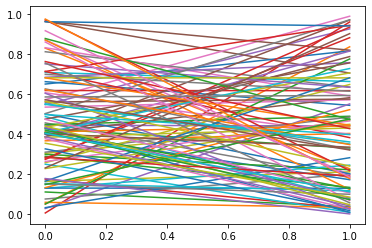

In [48]:
plot = plt.plot(x_data_mat)
plt.show()

In [49]:
np.mean(x_data_mat[0]), np.mean(x_data_mat[1])

(0.46534990773129586, 0.41871086431153687)

In [50]:
np.var(x_data_mat[0]), np.var(x_data_mat[1])

(0.06303312780915067, 0.08594416019974556)

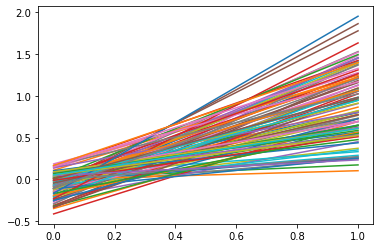

In [51]:
plot = plt.plot(a_mat)
plt.show()

In [52]:
np.mean(a_mat[0]), np.mean(a_mat[1])

(-0.06496432731407144, 0.918522678376606)

In [53]:
np.var(a_mat[0]), np.var(a_mat[1])

(0.018367730311886647, 0.16987457646152376)

In [83]:
a_mat[1] - a_mat[0]

array([1.33682695, 1.0413301 , 0.16135754, 0.21791627, 1.66795469,
       1.84242133, 1.76834095, 0.31670483, 0.42251734, 0.60218065,
       1.64562864, 1.13796932, 0.83846221, 1.14168159, 0.68140911,
       1.97711631, 1.14483047, 1.60139805, 0.84986449, 0.27355858,
       0.46188963, 0.86130541, 0.46192133, 1.33543671, 0.98724398,
       1.11440272, 1.56912269, 0.69542198, 0.79576912, 0.99265303,
       0.76427358, 0.95295754, 1.04811127, 1.37686385, 1.38176998,
       1.55212961, 1.10754444, 0.8984481 , 1.2893489 , 1.52565125,
       0.62295441, 1.05819996, 0.5763919 , 1.19931762, 1.61154858,
       1.3355675 , 1.23619943, 1.67445113, 1.03598147, 0.42632986,
       0.29057514, 0.10355982, 0.97039212, 1.39136505, 0.5502594 ,
       1.39118327, 0.82712303, 1.03857425, 0.91239846, 1.28760932,
       0.36852689, 0.75694888, 0.59234325, 1.27510945, 1.53605919,
       1.26698267, 0.42806777, 1.45806724, 1.51903945, 0.30012236,
       0.36414342, 1.23916691, 1.4792786 , 1.86258347, 0.66413

**Antwort:**

- Wir können beobachten, dass nun alle "Bewegungen" positiv sind. War dass gefragt? 

--- 

#### b)

Betrachte als Alternative zu dem in Aufgabe 3 praktizierten Verfahren ein iteratives Schema mit folgenden zwei Schritten:
$$
\begin{align*}
\boldsymbol{w}_i  &= \boldsymbol{C} \boldsymbol{v}_{i - 1} \\
\boldsymbol{v}_i  &= \boldsymbol{w}_i /  || \boldsymbol{w}_{i} ||
\end{align*} 
$$

fur $i = 1, \dots, m.$ Wiederhole das gesamte Schema 10 Mal und beginne jeweils mit einem zufällig gewählten Richtungsvektor $v_0$. Was beobachtest Du fur eine passende Wahl von $m$? Wie läßt sich die Konvergenz des Verfahrens feststellen bzw. “monitoren”? Tip: fur das Skalarprodukt (`np.dot`) zweier Vektoren `a` und
`b`gilt:
$$
    a^T b = ||a|| ||b|| \cos \phi
$$
wobei $\phi$ den Winkel zwischen beiden Vektoren bezeichnet.

In [55]:
# C als Covarianz-Matrix
c_cov_mat = np.cov(x_data_mat, bias=True)

(2, 2)

In [67]:
# Funktion
def iter_solve(initial_alpha, covar, iters):
    # startwert
    v_list, w_list = [], []
    v_vec = np.array([np.cos(initial_alpha), np.sin(initial_alpha)])
    v_vec.reshape(2, 1)
    v_list.append(v_vec)
    w_list.append(0)
    i = 1
    while i < iters:
        w_iter = covar @ v_vec
        v_vec_new = w_iter/np.linalg.norm(w_iter)
        v_list.append(v_vec_new)
        w_list.append(w_iter)
        v_vec = v_vec_new
        i += 1
    return v_vec, v_list, w_list

**Antwort:**

- Konvergenz festzustellen bei numerischen Verfahren wird meist dadurch gelöst, dass man eine Art Konvergenz-Kriterium festlegt.
- Generell würde ich hierbei unterstellen, dass Konvergenz (mathematisch-inkorrekt) besteht wenn:
$$
    \lim \limits_{n \to \infty} || \nabla f_n || = 0 
$$
also wenn die Gradienten Norm gegen Null konvergiert.
- In unserem Fall, vor allem da wir hier numerische sind, würde dies umformuliert wie folgt sein:
$$
    \lim \limits_{k \to \infty} \dfrac{f(x_{k+1}) - f(x_{k})}{\Delta x} = \varepsilon 
$$
wobei $\varepsilon$ eine beliebige kleine Konvergenz-Grenze. Meist so gegen `1e-5`.

In [79]:
# Test wann die Sache konvergiert
test0, v_0, w_0 = iter_solve(0, covar = c_cov_mat, iters = 500)
test1, v_1, w_1 = iter_solve(1, covar = c_cov_mat, iters = 500)
test2, v_2, w_2 = iter_solve(2, covar = c_cov_mat, iters = 500)
test3, v_3, w_3 = iter_solve(3, covar = c_cov_mat, iters = 500)
test4, v_4, w_4 = iter_solve(4, covar = c_cov_mat, iters = 500)
test5, v_5, w_5 = iter_solve(5, covar = c_cov_mat, iters = 500)
test6, v_6, w_6 = iter_solve(6, covar = c_cov_mat, iters = 500)
test7, v_7, w_7 = iter_solve(7, covar = c_cov_mat, iters = 500)
test8, v_8, w_8 = iter_solve(8, covar = c_cov_mat, iters = 500)
test9, v_9, w_9 = iter_solve(9, covar = c_cov_mat, iters = 500)

In [81]:
test0, test1, test2, test3, test4, test5, test6, test7, test8, test9

(array([0.29403209, 0.95579555]),
 array([0.29403209, 0.95579555]),
 array([0.29403209, 0.95579555]),
 array([-0.29403209, -0.95579555]),
 array([-0.29403209, -0.95579555]),
 array([-0.29403209, -0.95579555]),
 array([0.29403209, 0.95579555]),
 array([0.29403209, 0.95579555]),
 array([0.29403209, 0.95579555]),
 array([0.29403209, 0.95579555]))

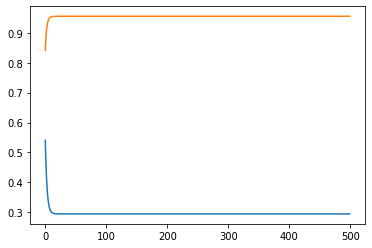

In [77]:
plot = plt.plot(v_0)
plt.show()

---

#### c)

Zeige schriftlich, dass die Summe der Eigenwerte der (geschätzten) Kovarianzmatrix, d.h. die Gesamtvarianz oder totale Varianz, dem mittleren quadratischen
Abstand der Datenpunkte vom Mittelwertsvektor $m$
$$
\dfrac{1}{n} \sum_{i=1}^{n} ||x_i - m||^2
$$

enspricht. Tip: die Summe der Eigenwerte entspricht der Summe der Diagonalelemente der Kovarianzmatrix! Was beschreibt dann dementsprechend ein einzelner Eigenwert der Kovarianzmatrix?

**Antwort:**

Wir führen die Matrix $A$, Vektor $Z$ und $\Sigma$ als die Varianz-Kovarianz Matrix von $Y$ ein.
$z$ sei der Vektor der Hauptkomponenten, $A$ sei die $m \times m$ Matrix in deren Solaten die Eigenvektoren beinhaltet sind.
$A$ sei definiert als: $A = \left[ a_1, \dots, a_m \right]$ und $z$ als $Z = A^T  Y$.

Die Varianz-Kovarianz von $Z$ sei hierbei $\Lambda$. Da wir wissen, dass die Varianzen der Hauptkomponenten gleich den Eigenwerten und sie unkorreliert sind, sei die Matrix wie folgt gegeben:
$$
\begin{equation*}
    \Lambda = 
    \begin{pmatrix}
        \lambda_1 & 0         & \dots & 0         \\
        0         & \lambda_2 & \dots & 0         \\
        \vdots    &           &       &           \\
        0         & 0         & \dots & \lambda_m \\ 
    \end{pmatrix}.
\end{equation*}
$$

Wir können nun etwas umschreiben und es vereinfachen durch: $Var(Z) = Var(A^T) = A^T \Sigma A$. 
Dadurch gilt:
$$
    \Lambda = A^T \Sigma A.
$$

Wir wissen auch, dass die Eigenwerte die Varuanen der jeweiligen unterliegenden Hauptkomponenten ist. Daher können wir das folgende behaupten:
$$
    \sum_{i = 1}^{m} Var(Z_i) = \sum_{i=1}^{m} \lambda_i = tr(\Lambda)
$$

Wir wissen aber auch, dass 
$$
    tr(\Lambda) = tr(A^T \Sigma A) = tr(\Sigma A A^T ) = tr(\Sigma) = \sum_{i=1}^{m} Var(Y_i)
$$
* gegeben, dass möglich ist $tr(AB) = tr(BA)$, wenn $AB$ quadratisch ist.

---

#### d) 

Wie könnte man ohne Verwendung der Funktion `np.linalg.eig` mehrere Eigenvektoren hintereinander mit dem iterativen Verfahren aus b) berechnen? Verwende dabei folgende Equivalenz
$$
C =  \sum_{i=1}^{d} \lambda_i u_i u_i^T .
$$

um den Anteil der Varianz in der schon gefundenen Richtung fur die Suche der nächsten Richtung zu eliminieren. Verwende dazu `np.outer` fur das äußere Produkt zwischen zwei Vektoren! Fasse die komplette Berechnung der Eigenwerte/vektoren in einer Funktion `power_method(x data mat, n evs)` zusammen, wobei n evs die vom Benutzer gewunschte Anzahl der “führenden” Eigenwerte/vektoren spezifiziert

In [93]:
# Power-Methode
def power_method(array, iters):
    # start werte
    x = len(array)
    i = 1
    while i < iters:
        x = np.dot(array, x)
        lambdas = abs(x).max()
        x = x/x.max()
        i += 1
    return lambdas, x


In [97]:
a = np.array([[6, 2], 
              [2, 3]])

In [98]:
test = power_method(array = a, iters = 10)
test

(6.999944491328071,
 array([[1.        , 0.49999207],
        [0.49999207, 0.25001189]]))

In [99]:
np.linalg.eig(a)

(array([7., 2.]),
 array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

----

### Aufgabe 2: Versteckte Strukturen

Lade die Datensätze `hidden1.csv` und `hidden2.csv` aus dem Verzeichnis http://www.gobics.de/peter/DMBdata/, welche jeweils uber 10 Dimensionen (Matrixspalten) verfugen. Verwende dabei die Funktion `np.genfromtxt`. Verwende im Folgenden fur die Visualisierungen `pyplot` mit `import matplotlib.pyplot
as plt` als vorherigem Aufruf.

#### a) Histogramme: 

Untersuche die Verteilungen der einzelnen Dimensionen mittels der Funktion plt.hist und variiere die Anzahl der Histogrammbalken. Welcher Verteilung scheinen die Histogramme am ehesten zu entsprechen?

#### b) Scatterplots:

Visualisiere jeweils zwei Dimensionen der Datenpunkte aus `hidden1.csv` mit `plt.plot`. Schreibe ein Skript, das alle möglichen Kombinationen von zwei Dimensionen als separate Plots in einer Grafik darstellt. Tip: Integriere die verschiedenen Scatterplots mittels `plt.subplot`. Geben die Scatterplots mehr Auskunft uber die Gesamtverteilung und eventuell vorhandene Zusammenhänge/Strukturen in den Daten?

#### c)  Eigenwertspektrum: 
Visualisiere die Eigenwerte der Kovarianzmatrix mit Balkendiagrammen (s. Funktion `plt.bar`). Achte auf eine von links nach rechts absteigende Reihenfolge der Eigenwerte. Wieviele relevante Hauptkomponentenrichtungen unter den Eigenvektoren der Kovarianzmatrix lassen sich vermuten?



#### d) Hauptkomponenten:

Stelle die beiden Hauptkomponenten, die den größten Anteil der Varianz repräsentieren als Scatterplots dar. Zur Erinnerung: die Hauptkomponenten sind die Dimensionen, die aus der linearen Abbildung 
$$
    z = U^T x
$$

der mittelwertzentrierten Datenvariablen resultieren, wobei $U$ die Eigenvektoren der Kovarianzmatrix als Spalten enthält. D.h. die i-te Hauptkomponente entspricht dem Skalarprodukt $u_i^T x$.